In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from glob import glob

## Part 1 - Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

In [2]:
images = glob('camera_cal/calibration*.jpg')

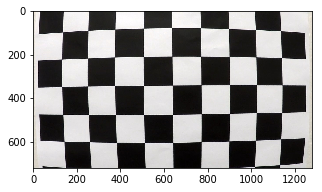

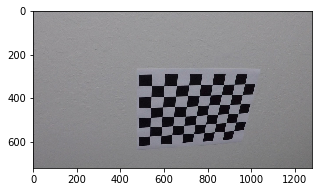

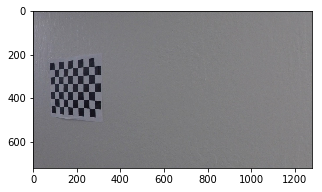

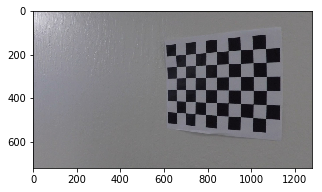

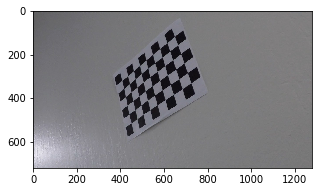

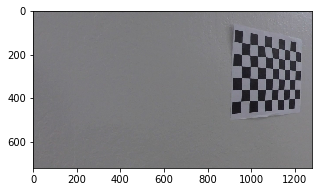

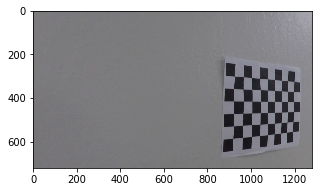

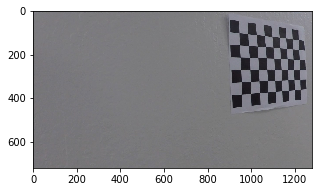

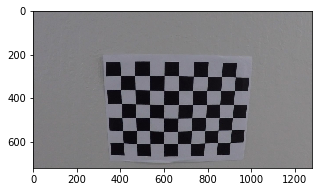

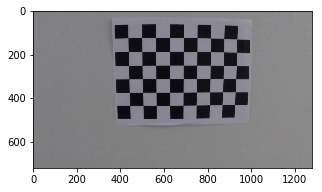

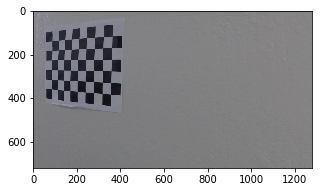

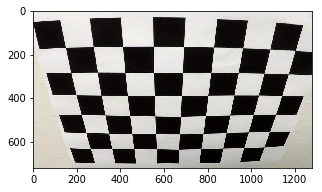

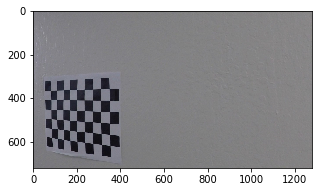

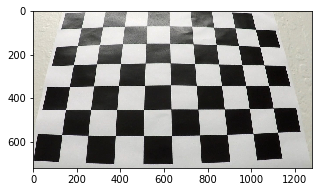

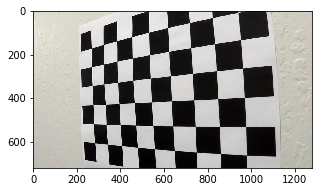

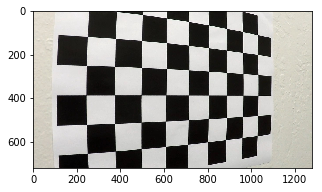

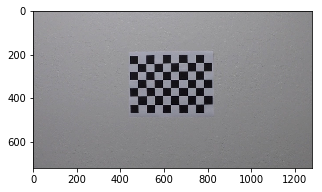

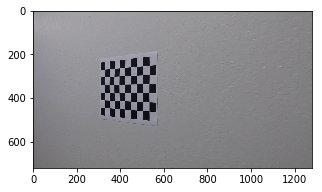

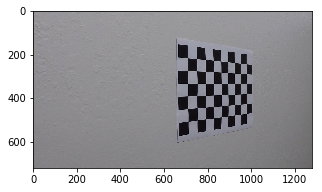

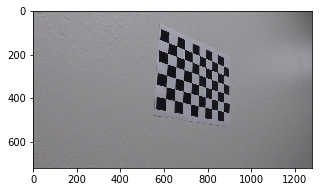

In [3]:
for i in range(len(images)):
    plt.figure(figsize=(5,5))
    img = mpimg.imread(images[i])
    plt.imshow(img)
plt.show()

In [4]:
def cameraCalibrationDistortion(images):
    
    obj = np.zeros((6*9, 3), np.float32)
    obj[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

    objpoints = []
    imgpoints = []
    
    for name in images:
        img = mpimg.imread(name)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret==True:
            imgpoints.append(corners)
            objpoints.append(obj)

            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    return cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

In [5]:
ret, mtx, dist, rvecs, tvecs = cameraCalibrationDistortion(images)

## Part 2 : Apply distortion correction to raw images.

In [6]:
def distortionCorrection(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [31]:
img = mpimg.imread('camera_cal/calibration2.jpg')
dst = distortionCorrection(img, mtx, dist)

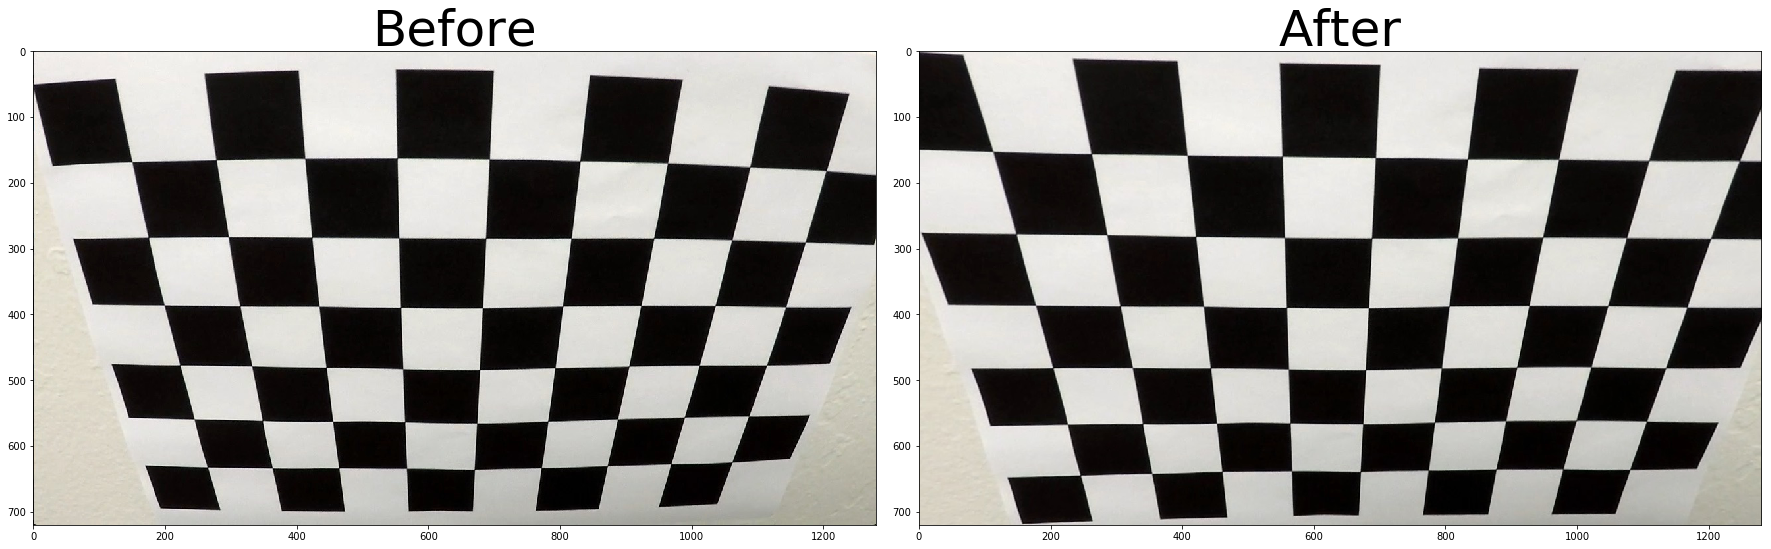

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Before', fontsize=50)
ax2.imshow(dst)
ax2.set_title('After', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Part 3 : Use color transforms, gradients, etc., to create a thresholded binary image.

In [80]:
image = mpimg.imread('test_images/straight_lines1.jpg')

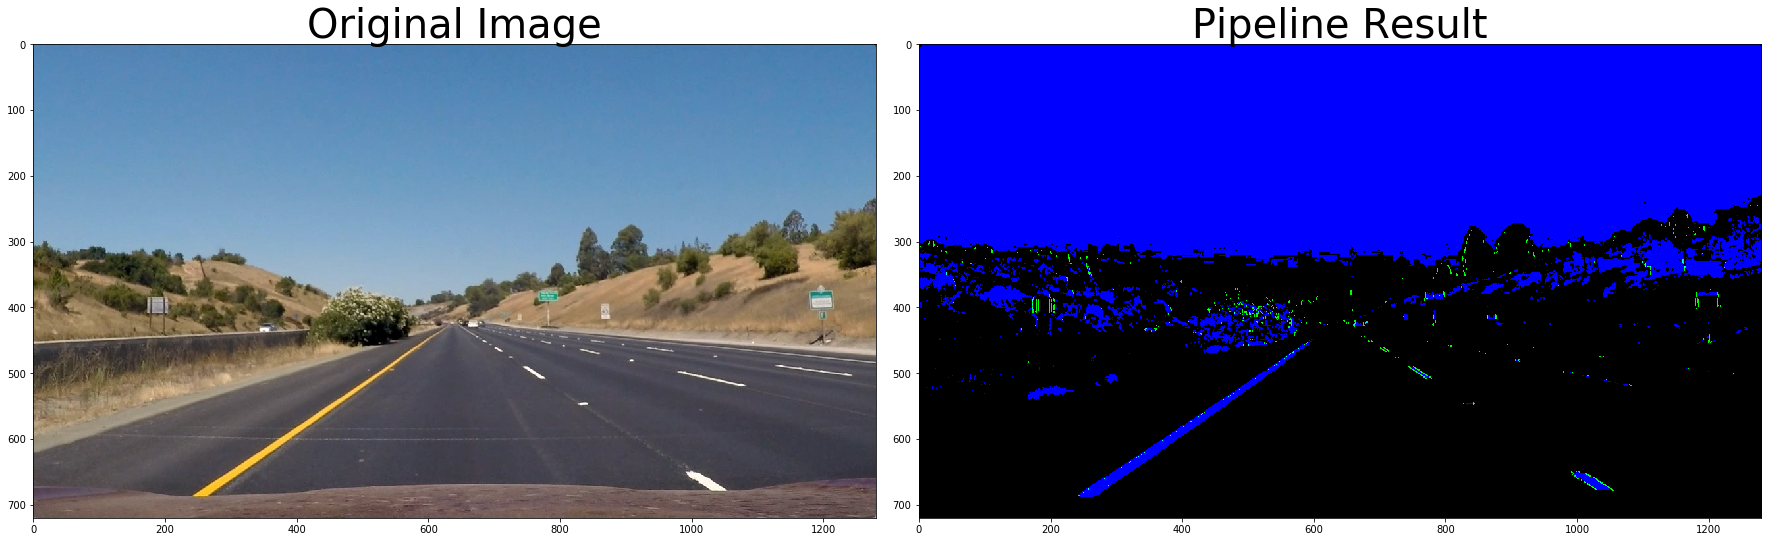

In [81]:
def pipeline(img, s_thresh=(90, 255), sx_thresh=(80, 200)):
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()